In [1]:
# sanity check after restart the kernel

print("abc")

abc


In [ ]:
# create the .kaggle directory and an empty kaggle.json file
# only need for running the first time

# !mkdir -p .kaggle
# !touch .kaggle/kaggle.json
# !chmod 600 .kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
#no need if credential is already in .kaggle/kaggle.json

# import json
# kaggle_username = "kanericaws"
# kaggle_key = "<kaggle_key>"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
#only need for the first run
#!kaggle competitions download -c bike-sharing-demand


In [ ]:
# If you already downloaded it you can use the -o command to overwrite the file
#only need for the first run

#!unzip -o bike-sharing-demand.zip

In [2]:
# load the dataset 
import pandas as pd
from autogluon.tabular import TabularPredictor

train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")


In [ ]:
test.head()

In [ ]:
train.head()


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

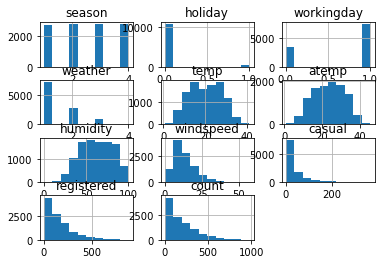

In [3]:
train.hist()

In [5]:
#create additional features

#convert str to datetime object
#format='%Y%m%d-%H%M%S'
#20210328-200000
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

train['dt_obj'] =pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['dt_obj'] =pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

# create new features
#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
# train['year'] = train['dt_obj'].dt.year
# train['dt_obj'].dt.month = train['dt_obj'].dt.month
# train['day'] = train['dt_obj'].dt.day
# train['dt_obj'].dt.hour = train['dt_obj'].dt.hour
# train['min'] = train['dt_obj'].dt.minute
# train['second'] = train['dt_obj'].dt.second
# train['dayofweek'] = train["dt_obj"].dt.dayofweek

# test['year'] = test['dt_obj'].dt.year
# test['dt_obj'].dt.month = test['dt_obj'].dt.month
# test['day'] = test['dt_obj'].dt.day
# test['dt_obj'].dt.hour = test['dt_obj'].dt.hour
# test['min'] = test['dt_obj'].dt.minute
# test['second'] = test['dt_obj'].dt.second
# test['dayofweek'] = test["dt_obj"].dt.dayofweek

train['season_label']=0

#winter
train.loc[train['dt_obj'].dt.month == 1 , 'season_label'] = 1
train.loc[train['dt_obj'].dt.month == 2 , 'season_label'] = 1
train.loc[train['dt_obj'].dt.month == 12 , 'season_label'] = 1
#spring
train.loc[train['dt_obj'].dt.month == 3 , 'season_label'] = 2
train.loc[train['dt_obj'].dt.month == 4 , 'season_label'] = 2
train.loc[train['dt_obj'].dt.month == 5 , 'season_label'] = 2
#summer
train.loc[train['dt_obj'].dt.month == 6 , 'season_label'] = 3
train.loc[train['dt_obj'].dt.month == 7 , 'season_label'] = 3
train.loc[train['dt_obj'].dt.month == 8 , 'season_label'] = 3

#winter
train.loc[train['dt_obj'].dt.month == 9, 'season_label'] = 4
train.loc[train['dt_obj'].dt.month == 10 , 'season_label'] = 4
train.loc[train['dt_obj'].dt.month == 11 , 'season_label'] = 4

test['season_label']=0
#winter
test.loc[test['dt_obj'].dt.month == 1 , 'season_label'] = 1
test.loc[test['dt_obj'].dt.month == 2 , 'season_label'] = 1
test.loc[test['dt_obj'].dt.month == 12 , 'season_label'] = 1
#spring
test.loc[test['dt_obj'].dt.month == 3 , 'season_label'] = 2
test.loc[test['dt_obj'].dt.month == 4 , 'season_label'] = 2
test.loc[test['dt_obj'].dt.month == 5 , 'season_label'] = 2
#summer
test.loc[test['dt_obj'].dt.month == 6 , 'season_label'] = 3
test.loc[test['dt_obj'].dt.month == 7 , 'season_label'] = 3
test.loc[test['dt_obj'].dt.month == 8 , 'season_label'] = 3

#winter
test.loc[test['dt_obj'].dt.month == 9, 'season_label'] = 4
test.loc[test['dt_obj'].dt.month == 10 , 'season_label'] = 4
test.loc[test['dt_obj'].dt.month == 11 , 'season_label'] = 4

#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
train['hr_label']=0
#7-9
train.loc[train['dt_obj'].dt.hour == 7 , 'hr_label'] = 1
train.loc[train['dt_obj'].dt.hour == 8 , 'hr_label'] = 1
train.loc[train['dt_obj'].dt.hour == 9 , 'hr_label'] = 1
#11-13
train.loc[train['dt_obj'].dt.hour == 11 , 'hr_label'] = 2
train.loc[train['dt_obj'].dt.hour == 12, 'hr_label'] = 2
train.loc[train['dt_obj'].dt.hour == 13 , 'hr_label'] = 2
#17-18
train.loc[train['dt_obj'].dt.hour == 17 , 'hr_label'] = 3
train.loc[train['dt_obj'].dt.hour == 18 , 'hr_label'] = 3



#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
test['hr_label']=0
#7-9
test.loc[test['dt_obj'].dt.hour == 7 , 'hr_label'] = 1
test.loc[test['dt_obj'].dt.hour == 8 , 'hr_label'] = 1
test.loc[test['dt_obj'].dt.hour == 9 , 'hr_label'] = 1
#11-13
test.loc[test['dt_obj'].dt.hour == 11 , 'hr_label'] = 2
test.loc[test['dt_obj'].dt.hour == 12, 'hr_label'] = 2
test.loc[test['dt_obj'].dt.hour == 13 , 'hr_label'] = 2
#17-18
test.loc[test['dt_obj'].dt.hour == 17 , 'hr_label'] = 3
test.loc[test['dt_obj'].dt.hour == 18 , 'hr_label'] = 3

test['temp_label']=0
#cold
test.loc[test['temp'] <15  , 'temp_label'] = 1
#mild
test.loc[((test['temp'] >= 15) &( test['temp'] <= 26)), 'temp_label'] = 2
#hot
test.loc[test['temp'] > 26 , 'temp_label'] = 3

train['temp_label']=0
#cold
train.loc[train['temp'] <15  , 'temp_label'] = 1
#mild
train.loc[((train['temp'] >= 15) &( train['temp'] <= 26)), 'temp_label'] = 2
#hot
train.loc[train['temp'] > 26 , 'temp_label'] = 3


train['hum_label']=0
#not-hum
train.loc[train['humidity'] <55  , 'hum_label'] = 1
#hum
train.loc[(train['humidity'] >= 55), 'hum_label'] = 2


test['hum_label']=0
#not-hum
test.loc[test['humidity'] <55  , 'hum_label'] = 1
#hum
test.loc[(test['humidity'] >= 55), 'hum_label'] = 2

test['windspeed']=0
#not-windy
test.loc[test['windspeed'] <20  , 'windspeed_label'] = 1
#windy
test.loc[(test['windspeed'] >= 20), 'windspeed_label'] = 2

train['windspeed_label']=0
#not-windy
train.loc[train['windspeed'] <20  , 'windspeed_label'] = 1
#windy
train.loc[(train['windspeed'] >= 20), 'windspeed_label'] = 2





In [6]:
#sanity check
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_label,hr_label,temp_label,hum_label,windspeed_label
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2.505328,0.627871,1.972625,1.621808,1.137332
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,1.116839,0.993757,0.771557,0.484958,0.344214
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2.000000,0.000000,1.000000,1.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,3.000000,0.000000,2.000000,2.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,4.000000,1.000000,3.000000,2.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,4.000000,3.000000,3.000000,2.000000,2.000000


In [7]:
# Change weather column to a category 

train.loc[:, "season_label"] = train["season_label"].astype("category")
train.loc[:, "hr_label"] = train["hr_label"].astype("category")
train.loc[:, "temp_label"] = train["temp_label"].astype("category")
train.loc[:, "hum_label"] = train["hum_label"].astype("category")
train.loc[:, "windspeed_label"] = train["windspeed_label"].astype("category")

test.loc[:, "season_label"] = test["season_label"].astype("category")
test.loc[:, "hr_label"] = test["hr_label"].astype("category")
test.loc[:, "temp_label"] = test["temp_label"].astype("category")
test.loc[:, "hum_label"] = test["hum_label"].astype("category")
test.loc[:, "windspeed_label"] = test["windspeed_label"].astype("category")


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#sanity check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10886 non-null  object        
 1   season           10886 non-null  int64         
 2   holiday          10886 non-null  int64         
 3   workingday       10886 non-null  int64         
 4   weather          10886 non-null  int64         
 5   temp             10886 non-null  float64       
 6   atemp            10886 non-null  float64       
 7   humidity         10886 non-null  int64         
 8   windspeed        10886 non-null  float64       
 9   casual           10886 non-null  int64         
 10  registered       10886 non-null  int64         
 11  count            10886 non-null  int64         
 12  dt_obj           10886 non-null  datetime64[ns]
 13  season_label     10886 non-null  category      
 14  hr_label         10886 non-null  categ

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         6493 non-null   object        
 1   season           6493 non-null   int64         
 2   holiday          6493 non-null   int64         
 3   workingday       6493 non-null   int64         
 4   weather          6493 non-null   int64         
 5   temp             6493 non-null   float64       
 6   atemp            6493 non-null   float64       
 7   humidity         6493 non-null   int64         
 8   windspeed        6493 non-null   int64         
 9   dt_obj           6493 non-null   datetime64[ns]
 10  season_label     6493 non-null   category      
 11  hr_label         6493 non-null   category      
 12  temp_label       6493 non-null   category      
 13  hum_label        6493 non-null   category      
 14  windspeed_label  6493 non-null   categor

In [11]:
#train registered and casual riders seperately
train_c=train
train_c = train_c.drop('registered',axis=1)
train_c = train_c.drop('count',axis=1)

train_r=train
train_r = train_r.drop('casual',axis=1)
train_r = train_r.drop('count',axis=1)


In [12]:
train_r = train_r.drop('datetime',axis=1)
#train_r = train_r.drop('dt_obj',axis=1)

train_c = train_c.drop('datetime',axis=1)
#train_c = train_c.drop('dt_obj',axis=1)

test = test.drop('datetime',axis=1)
#test = test.drop('dt_obj',axis=1)



In [13]:
#sanity check
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           10886 non-null  int64         
 1   holiday          10886 non-null  int64         
 2   workingday       10886 non-null  int64         
 3   weather          10886 non-null  int64         
 4   temp             10886 non-null  float64       
 5   atemp            10886 non-null  float64       
 6   humidity         10886 non-null  int64         
 7   windspeed        10886 non-null  float64       
 8   casual           10886 non-null  int64         
 9   dt_obj           10886 non-null  datetime64[ns]
 10  season_label     10886 non-null  category      
 11  hr_label         10886 non-null  category      
 12  temp_label       10886 non-null  category      
 13  hum_label        10886 non-null  category      
 14  windspeed_label  10886 non-null  categ

In [14]:
#sanity check
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           10886 non-null  int64         
 1   holiday          10886 non-null  int64         
 2   workingday       10886 non-null  int64         
 3   weather          10886 non-null  int64         
 4   temp             10886 non-null  float64       
 5   atemp            10886 non-null  float64       
 6   humidity         10886 non-null  int64         
 7   windspeed        10886 non-null  float64       
 8   registered       10886 non-null  int64         
 9   dt_obj           10886 non-null  datetime64[ns]
 10  season_label     10886 non-null  category      
 11  hr_label         10886 non-null  category      
 12  temp_label       10886 non-null  category      
 13  hum_label        10886 non-null  category      
 14  windspeed_label  10886 non-null  categ

In [15]:
#sanity check
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           6493 non-null   int64         
 1   holiday          6493 non-null   int64         
 2   workingday       6493 non-null   int64         
 3   weather          6493 non-null   int64         
 4   temp             6493 non-null   float64       
 5   atemp            6493 non-null   float64       
 6   humidity         6493 non-null   int64         
 7   windspeed        6493 non-null   int64         
 8   dt_obj           6493 non-null   datetime64[ns]
 9   season_label     6493 non-null   category      
 10  hr_label         6493 non-null   category      
 11  temp_label       6493 non-null   category      
 12  hum_label        6493 non-null   category      
 13  windspeed_label  6493 non-null   category      
dtypes: category(5), datetime64[ns](1), float

In [ ]:
#https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html
predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=300, num_bag_folds=10, num_bag_sets=1, num_stack_levels=3
)
# predictor_r = TabularPredictor(label='registered', eval_metric='r2').fit(train_r,
#     num_bag_folds=10, num_bag_sets=1, num_stack_levels=3
#     #hyperparameters = {'NN_TORCH': {'num_epochs': 20}, 'GBM': {'num_boost_round': 200}}  # last  argument is just for quick demo here, omit it in real applications
# )

In [ ]:
train_r.nunique()

In [ ]:
train_c.nunique()

In [ ]:
train_r.describe()

In [ ]:
#https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html
predictor_c = TabularPredictor(label='casual',problem_type="regression", eval_metric='r2').fit(train_c,
    num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300
    #hyperparameters = {'NN_TORCH': {'num_epochs': 20}, 'GBM': {'num_boost_round': 200}},  # last  argument is just for quick demo here, omit it in real applications
)

In [ ]:
predictor_r = TabularPredictor.load("AutogluonModels/ag-20220901_071344")

In [ ]:
predictor_c = TabularPredictor.load("AutogluonModels/ag-20220901_070455")

In [ ]:
y_pred_r = predictor_r.predict(test)


In [ ]:
y_pred_c = predictor_c.predict(test)


In [ ]:
y_pred_r

In [16]:
predictor_c = TabularPredictor(label="casual",problem_type="regression",eval_metric="r2").fit(
    train_data=train_c, time_limit=180, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220901_111043\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220901_111043\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5544.07 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.950930      17.575245  112.409997                0.000544           0.260069            3       True         12
1   RandomForestMSE_BAG_L2   0.949949      17.278055   92.577883                0.494182           8.083346            2       True         10
2          LightGBM_BAG_L2   0.948939      16.952417   90.204705                0.168544           5.710168            2       True          9
3          CatBoost_BAG_L2   0.943581      16.911975   98.356413                0.128102          13.861876            2       True         11
4      WeightedEnsemble_L2   0.940961      16.171501   48.894573                0.000999           0.307084            2       True          7
5    KNeighborsDist_BAG_L1   0.940035       0.033942    0.021930                

<AxesSubplot:xlabel='model'>

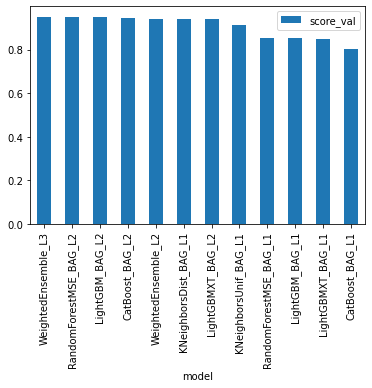

In [17]:
predictor_c.fit_summary()
#predictor_c = TabularPredictor.load("AutogluonModels/ag-20220901_111043\")

# ### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [18]:
y_pred_c = predictor_c.predict(test)

C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [20]:
predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=180, presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20220901_111503\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220901_111503\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: registered
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5388.63 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique value

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       LightGBMXT_BAG_L2   0.943427      11.649812  118.321535                7.982829          28.760859            2       True          9
1     WeightedEnsemble_L3   0.943427      11.650809  118.326519                0.000997           0.004985            3       True         10
2     WeightedEnsemble_L2   0.830418       3.112957   87.327672                0.000993           0.386183            2       True          8
3  RandomForestMSE_BAG_L1   0.780630       0.403810    4.090790                0.403810           4.090790            1       True          5
4    ExtraTreesMSE_BAG_L1   0.772028       0.520113    2.601264                0.520113           2.601264            1       True          7
5         LightGBM_BAG_L1   0.766407       0.602503    7.377722                0.60250

<AxesSubplot:xlabel='model'>

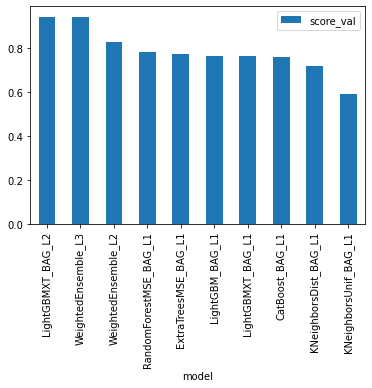

In [21]:
predictor_r.fit_summary()
#predictor_r = TabularPredictor.load("AutogluonModels/ag-20220901_111503\")
### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [22]:

y_pred_r = predictor_r.predict(test)


In [23]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

,count,datetime
2610,-1,2011-10-29 07:00:00
2611,-2,2011-10-29 08:00:00
2612,-2,2011-10-29 09:00:00
2634,-3,2011-10-30 07:00:00
2635,-3,2011-10-30 08:00:00
2636,-4,2011-10-30 09:00:00
2826,-4,2011-11-26 07:00:00
2827,-4,2011-11-26 08:00:00
2828,-3,2011-11-26 09:00:00
2850,-1,2011-11-27 07:00:00


In [ ]:
#sanity check idea
#testx=pd.concat([test,y_pred_r, y_pred_c], axis=1, join='inner')
#testx.loc[(testx['registered']<0)]

In [24]:
result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "predictor_c = TabularPredictor.load(AutogluonModels/ag-20220901_111043\) predictor_r = TabularPredictor.load(AutogluonModels/ag-20220901_111503\)"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/155k [00:00<?, ?B/s]
  5%|5         | 8.00k/155k [00:00<00:02, 54.5kB/s]
100%|##########| 155k/155k [00:01<00:00, 132kB/s]  


In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
import autogluon.core as ag
from sklearn.model_selection import train_test_split
# df_train_c, df_test_c = train_test_split(train_c, test_size=0.2, random_state=0)
# df_train_r, df_test_r = train_test_split(train_r, test_size=0.2, random_state=0)

# nn_options = {  # specifies non-default hyperparameter values for neural network models
#     'num_epochs': 10,  # number of training epochs (controls training time of NN models)
#     'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
#     'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
#     'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
# }



# hyperparameters = {  # hyperparameters of each model type
#                    'GBM': gbm_options,
#                    'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
#                   }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# time_limit = 5*60  # train various models for ~2 min
# num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
# search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

# hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
#     'num_trials': num_trials,
#     'scheduler' : 'local',
#     'searcher': search_strategy,
# }

#do it as regression and see if there is an improvement --improve
#'num_boost_round': 400 


# predictor_c = TabularPredictor(label='casual', problem_type="regression").fit(
#     df_train_c, tuning_data=df_test_c, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


#conclusion for casual only change is to set it to regression
# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

predictor_r = TabularPredictor(label='registered').fit(
    df_train_r, tuning_data=df_test_r, time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)




In [ ]:
predictor_c = TabularPredictor(label="casual",problem_type="regression",eval_metric="r2").fit(
    train_data=train_c, time_limit=300, presets="best_quality"
)

In [ ]:
predictor_c.fit_summary()

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:

predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=300, presets="best_quality"
)

In [ ]:
predictor_r.fit_summary()

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
y_pred_c = predictor_c.predict(test)

In [ ]:
y_pred_r = predictor_r.predict(test)

In [ ]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)


# predictor_c_p = TabularPredictor(label="casual").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

In [ ]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_r.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [ ]:
# # # predict from specific model/stack
# # #i = 0  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_c_p.get_model_names()[i]
# #y_pred_r = predictor_r.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
#     #LightGBM\T2

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 1  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_c_p.get_model_names()[i]
# y_pred_c = predictor_c_p.predict(test, model=model_to_use)
# print(i);print(model_to_use);
# #LightGBM\T2


In [ ]:
# i = 10  # index of model to use

# for i in range(0, 11):
#     model_to_use = predictor_r.get_model_names()[i]
#     print(i);print(model_to_use);
# #y_pred_r = predictor_r.predict(test, model=model_to_use)


In [ ]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)

# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


In [ ]:
# predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_c = TabularPredictor(label="casual").fit(
#     train_data=train_c, time_limit=180, presets="best_quality"
# )

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# #i = 1  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_r.get_model_names()[i]
# #y_pred_c = predictor_c_p.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
# #LightGBM\T2

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 6  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_r.get_model_names()[i]
# print(i);print(model_to_use);

# y_pred_r = predictor_r.predict(test, model=model_to_use)
# #LightGBM\T2

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
test.info()

In [ ]:
y_pred_r


In [ ]:
y_pred_r[y_pred_r<0]

In [ ]:
y_pred_c[y_pred_c<0]

In [ ]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

In [ ]:
train_c.info()

In [ ]:






result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "drop datetime string. feature enginnering. use regression instead of classification in casual, num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300, R2 metric"